## Predicción Reservas

## Introducción

<div class="exercise">

- El objetivo es predecir las reservas del hotel.

- Se realizan diferentes predicciones de las reservas.

- Se tienen datos semanales desde 2015 hasta 2017-09-03. 

- Se dejan fuera de la estimación las 4 últimas semanas para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lectura
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472
2017-09-03,248


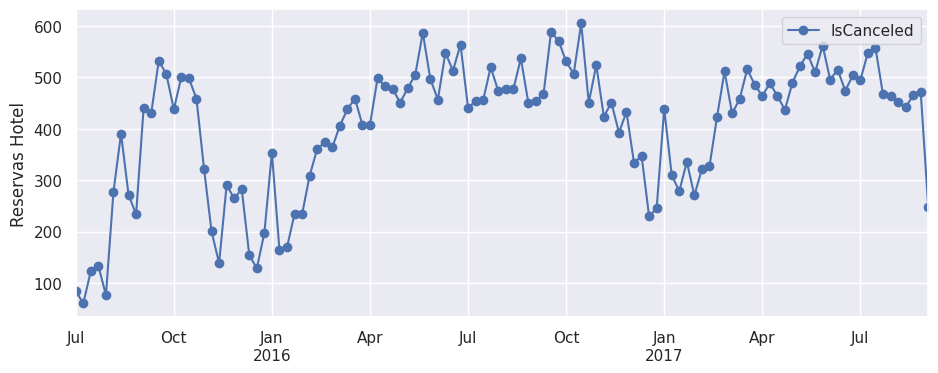

In [38]:
# Graficar Reservas
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('Reservas Hotel');

Analisis Estacionalidad
 - Componente estacional, meses con mayores reservas en octubre y descenso de las reservas durante el mes de enero

## Modelo de Suavizado Exponencial

In [35]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

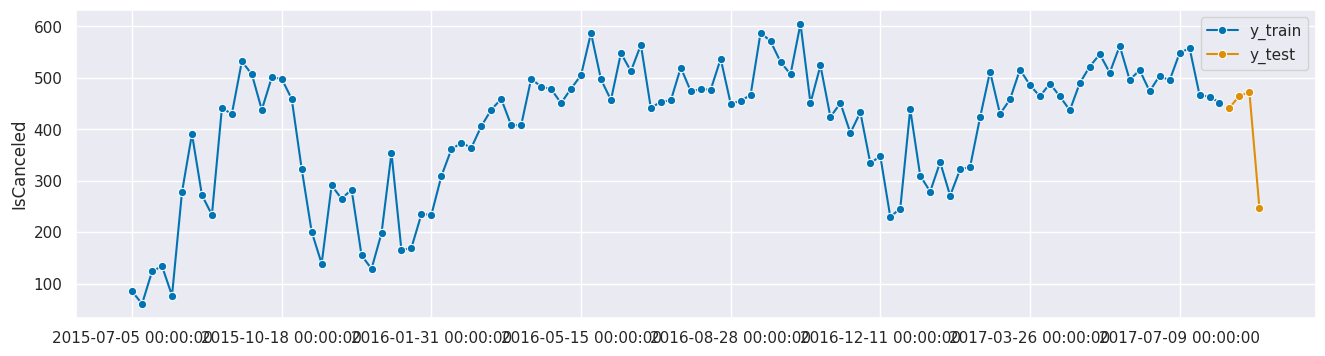

In [39]:
# Separamos la muestra entre train y test, vamos a predecir 4 periodos
y_train, y_test = temporal_train_test_split(y =df_w_r["IsCanceled"], test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [6]:
from sktime.forecasting.ets import AutoETS

In [7]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

# step 3: specifying the forecasting algorithm (4) son los periodos que es trimestral
df_w_r_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [8]:
df_w_r_model.fit(y_train) # Se estima con los datos de train SO LO

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

AutoETS(auto=True, n_jobs=-1, sp=4)

In [9]:
print(df_w_r_model.summary())

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  110
Model:                       ETS(ANN)   Log Likelihood                -624.668
Date:                Wed, 20 Dec 2023   AIC                           1255.336
Time:                        17:15:34   BIC                           1263.438
Sample:                    07-05-2015   HQIC                          1258.622
                         - 08-06-2017   Scale                         5012.674
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.6820      0.098      6.942      0.000       0.489       0.875
initial_level      84.2367     67.165      1.254      0.210     -47.404     215.877
Ljung-Box (Q):                  

In [10]:
# Predicciones
model_predict_r = df_w_r_model.predict(fh)
print(model_predict_r)

2017-08-13    458.557685
2017-08-20    458.557685
2017-08-27    458.557685
2017-09-03    458.557685
Freq: W-SUN, Name: IsCanceled, dtype: float64


In [11]:
model_predict_r_ints = df_w_r_model.predict_interval(fh, coverage=0.95) # Crear intervalo de prediccion
model_predict_r_ints

IsCanceled            
                  0.95            
                 lower       upper
2017-08-13  319.791758  597.323611
2017-08-20  290.591844  626.523525
2017-08-27  265.764881  651.350488
2017-09-03  243.788957  673.326412

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

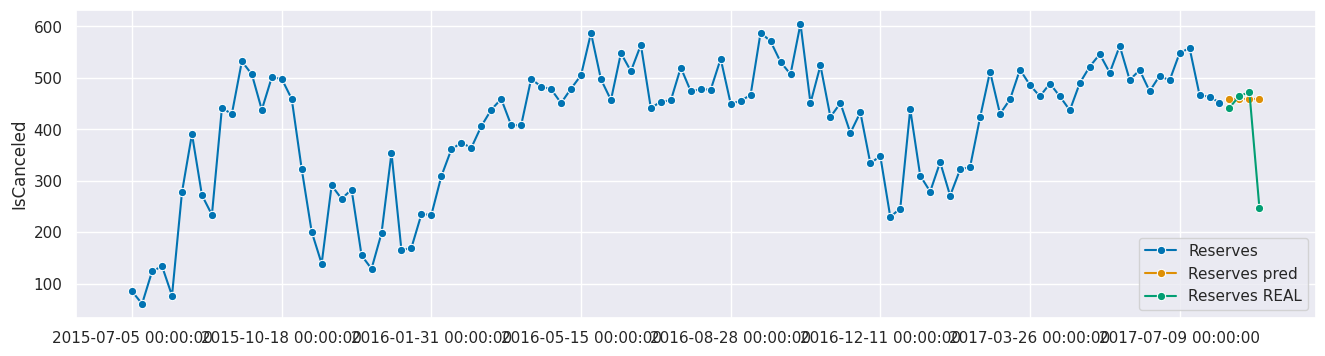

In [12]:
# Representar Predicciones
plot_series(y_train, model_predict_r,y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

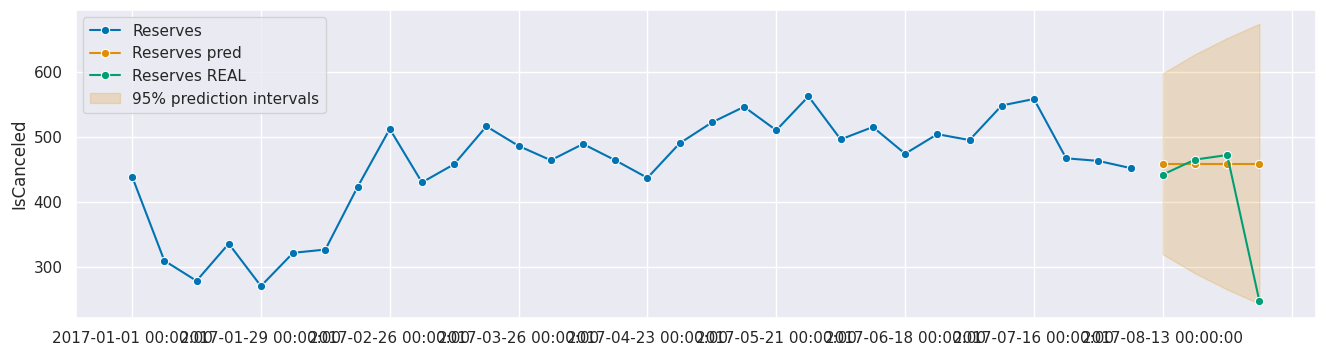

In [13]:
fig, ax = plot_series(y_train["2017":], model_predict_r, y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    model_predict_r_ints[('IsCanceled', 0.95, 'lower')],
    model_predict_r_ints[('IsCanceled', 0.95, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='upper left');

Precision de las predicciones

- MAPE

In [14]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, model_predict_r[0:4])  # Para calcular errores

0.2322044175570224

In [15]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, model_predict_r[0:4])

11207.723687036732

In [16]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, model_predict_r[0:4]) # Unidades de medida, tiene mas sentido que la primera al no estar elevada al cuadrado

105.86653714482557

-------

# Analisis Cancelaciones

In [32]:
# Lectura
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206
2017-09-03,101


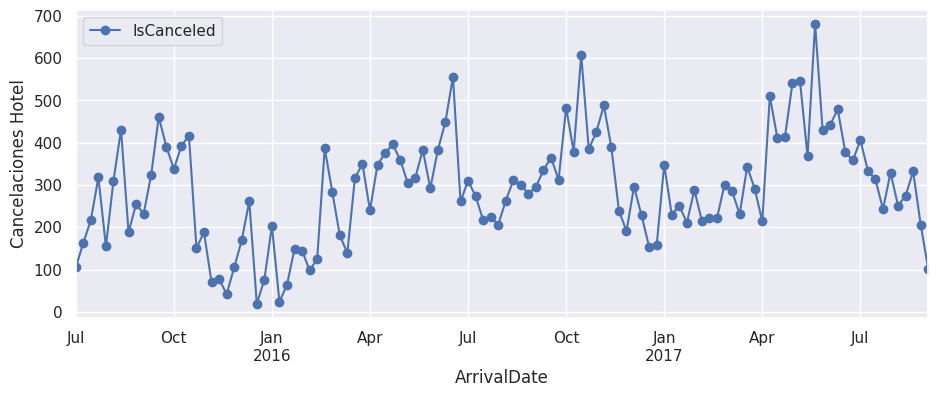

In [40]:
# Graficar Reservas
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_c.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel');

Analisis Estacionalidad
 - Componente estacional, meses con mayores reservas en octubre y descenso de las reservas durante el mes de enero

## Modelo de Suavizado Exponencial

In [41]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

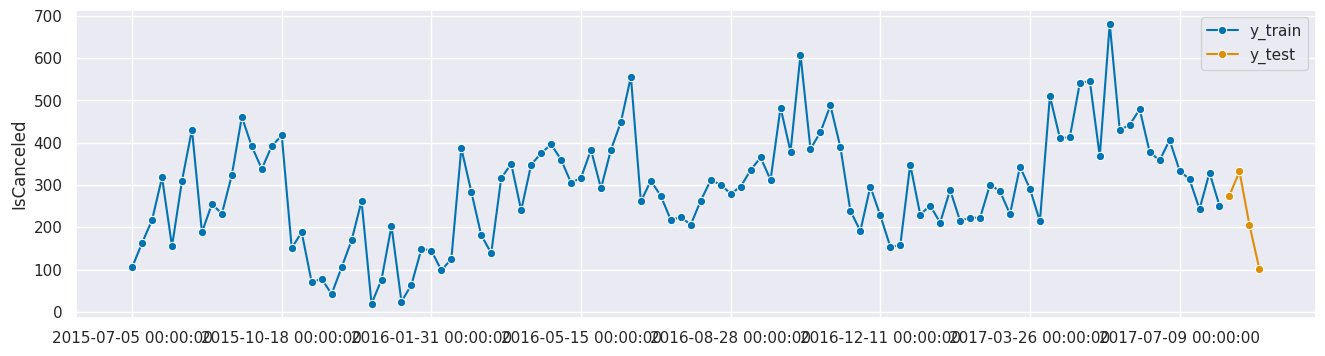

In [43]:
# Separamos la muestra entre train y test, vamos a predecir 4 periodos
y_train, y_test = temporal_train_test_split(y =df_w_c["IsCanceled"], test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [44]:
from sktime.forecasting.ets import AutoETS

In [46]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

# step 3: specifying the forecasting algorithm (4) son los periodos que es trimestral
df_w_c_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [47]:
df_w_c_model.fit(y_train) # Se estima con los datos de train SO LO

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

AutoETS(auto=True, n_jobs=-1, sp=4)

In [48]:
print(df_w_c_model.summary())

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  110
Model:                       ETS(ANA)   Log Likelihood                -654.142
Date:                Wed, 20 Dec 2023   AIC                           1324.285
Time:                        17:21:35   BIC                           1345.889
Sample:                    07-05-2015   HQIC                          1333.048
                         - 08-06-2017   Scale                         8566.566
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.5037      0.076      6.636      0.000       0.355       0.653
smoothing_seasonal  4.963e-05        nan        nan        nan         nan         nan
initial_level       

In [51]:
# Predicciones
model_predict_c = df_w_c_model.predict(fh)
print(model_predict_c)

2017-08-13    326.202876
2017-08-20    282.562948
2017-08-27    257.626369
2017-09-03    285.395661
Freq: W-SUN, Name: IsCanceled, dtype: float64


In [52]:
model_predict_c_ints = df_w_c_model.predict_interval(fh, coverage=0.95) # Crear intervalo de prediccion
model_predict_c_ints

IsCanceled            
                  0.95            
                 lower       upper
2017-08-13  144.796951  507.608801
2017-08-20   79.440617  485.685279
2017-08-27   34.895021  480.357717
2017-09-03   44.647192  526.144129

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

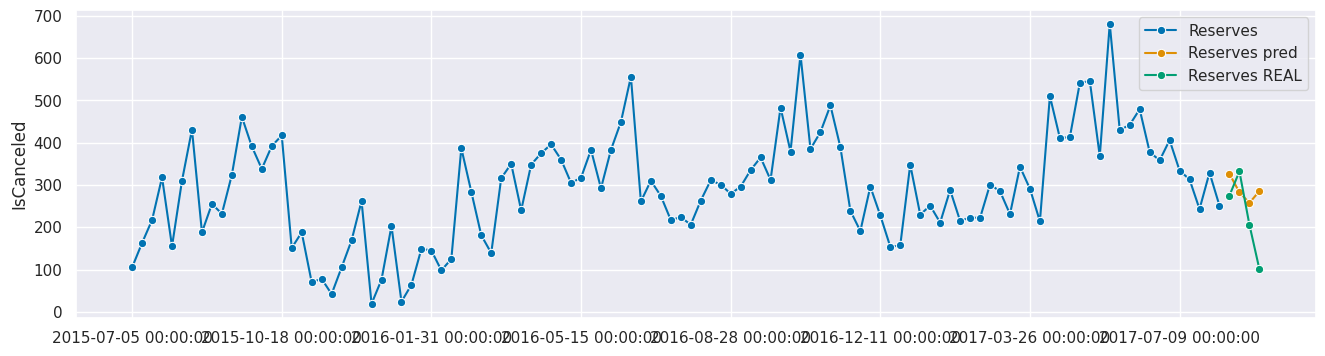

In [53]:
# Representar Predicciones
plot_series(y_train, model_predict_c,y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

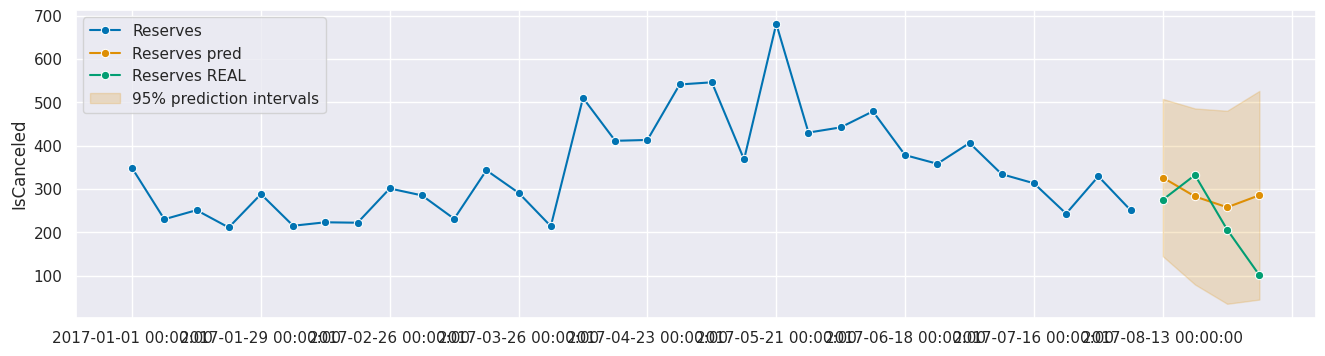

In [54]:
fig, ax = plot_series(y_train["2017":], model_predict_c, y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    model_predict_c_ints[('IsCanceled', 0.95, 'lower')],
    model_predict_c_ints[('IsCanceled', 0.95, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='upper left');

Precision de las predicciones

- MAPE

In [55]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, model_predict_c[0:4])  # Para calcular errores

0.6028530273197424

In [56]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, model_predict_c[0:4])

10433.199547506862

In [57]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, model_predict_c[0:4]) # Unidades de medida, tiene mas sentido que la primera al no estar elevada al cuadrado

102.14303474788117

------

Estimamos modelo de forma manual

In [17]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

y = df_w_r['IsCanceled']

df_w_r_model.fit(y)

print(df_w_r_model.summary())

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  114
Model:                       ETS(ANN)   Log Likelihood                -650.212
Date:                Wed, 20 Dec 2023   AIC                           1306.423
Time:                        17:15:36   BIC                           1314.632
Sample:                    07-05-2015   HQIC                          1309.755
                         - 09-03-2017   Scale                         5267.681
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.6760      0.099      6.816      0.000       0.482       0.870
initial_level      85.1026     68.705      1.239      0.215     -49.558     219.763
Ljung-Box (Q):                  

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

In [18]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=4)
forecaster.fit(y)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='additive')

In [19]:
y_pred = forecaster.predict(fh)
y_pred

2017-09-10    321.882812
2017-09-17    313.752795
2017-09-24    291.241629
2017-10-01    294.273780
Freq: W-SUN, Name: IsCanceled, dtype: float64

In [20]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               IsCanceled   No. Observations:                  114
Model:             ExponentialSmoothing   SSE                         666167.621
Optimized:                         True   AIC                           1004.733
Trend:                         Additive   BIC                           1026.623
Seasonal:                Multiplicative   AICC                          1006.869
Seasonal Periods:                     4   Date:                 Wed, 20 Dec 2023
Box-Cox:                          False   Time:                         17:15:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6485865                alpha                 True
smoothing_trend          

In [21]:
forecaster.get_fitted_params()

{'initial_level': 55.94870428037589,
 'initial_slope': None,
 'initial_seasons': array([1.80890336, 1.17844398, 1.70289156, 1.81307454]),
 'aic': 1004.7331893807306,
 'bic': 1026.6227769678865,
 'aicc': 1006.8691117108276}

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

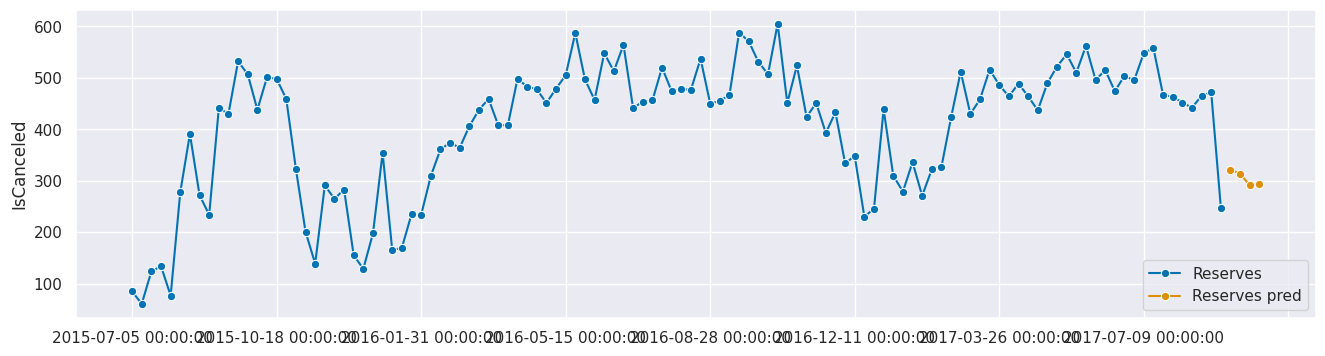

In [22]:
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional

In [23]:
forecaster = ExponentialSmoothing(trend='additive',seasonal=None, sp=4)
forecaster.fit(y)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ExponentialSmoothing(sp=4, trend='additive')

In [24]:
y_pred = forecaster.predict(fh)

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

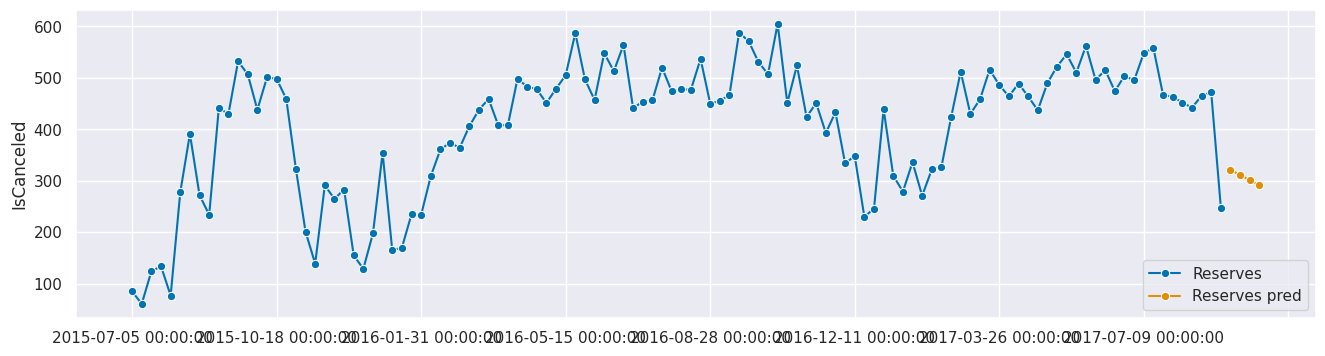

In [25]:
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional y tendencia multiplicativa

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

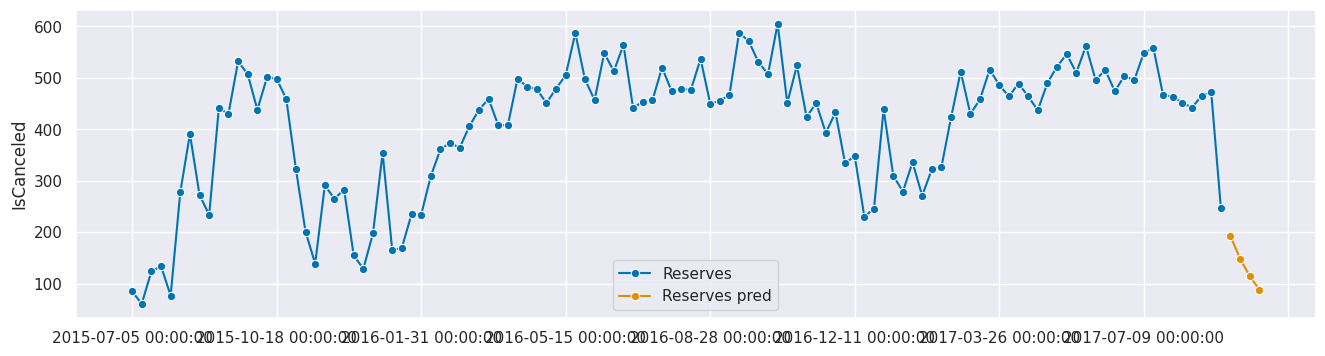

In [26]:
forecaster = ExponentialSmoothing(trend='mul',seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional y sin tendencia multiplicativa

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

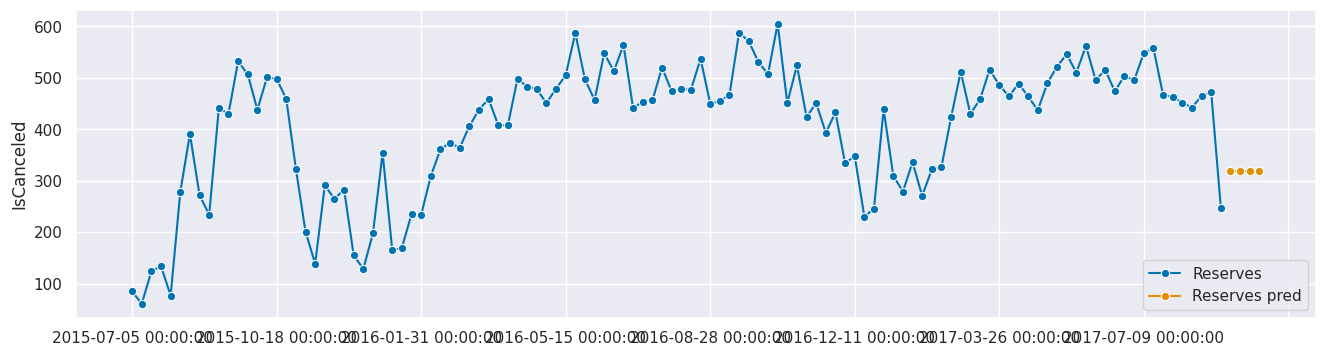

In [27]:
forecaster = ExponentialSmoothing(trend=None,seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional, multiplicative

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

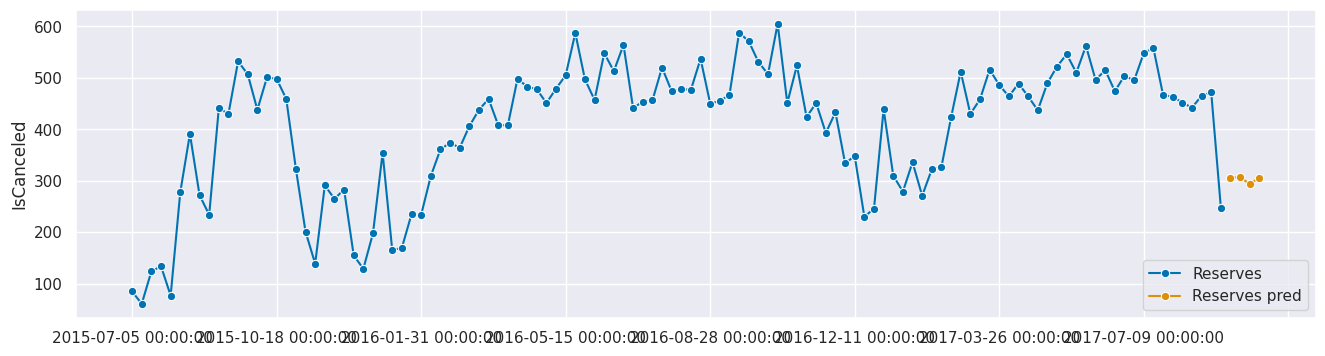

In [28]:
forecaster = ExponentialSmoothing(trend=None,seasonal="mul", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimemos modelo de forma manual sin tendencia, additive

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

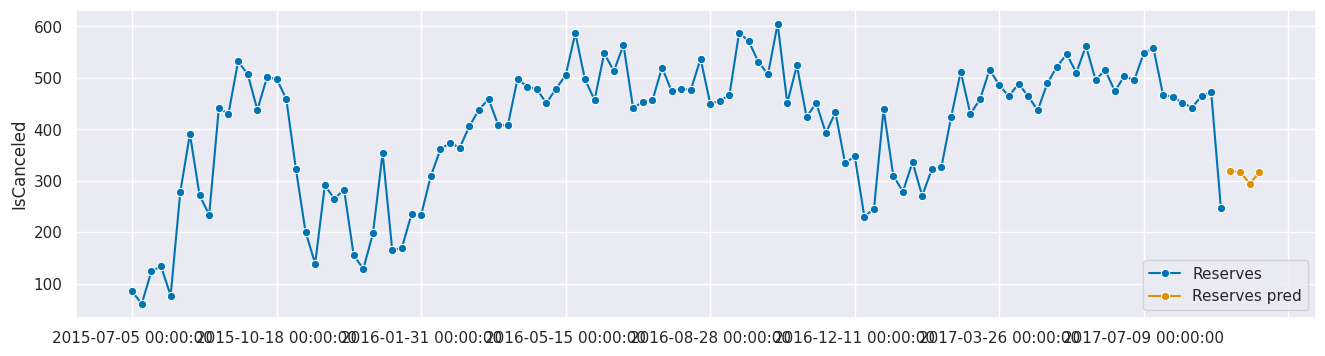

In [29]:
forecaster = ExponentialSmoothing(trend=None,seasonal="add", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Compara tendencia con tendencia additive, con y sin damped (Componente estacional aditivo)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

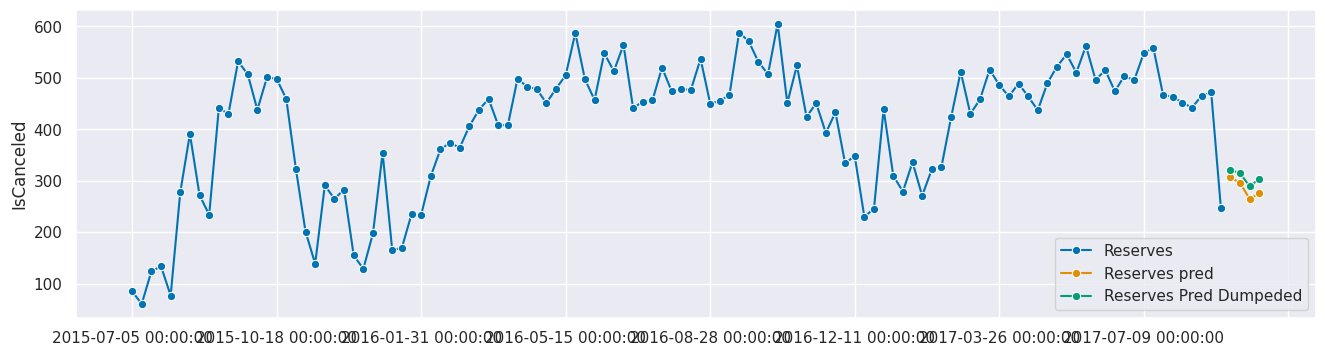

In [30]:
forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=False, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["Reserves", "Reserves pred","Reserves Pred Dumpeded"])